<a href="https://colab.research.google.com/github/ishara-bangkit-capstone-project/ishara-machine-learning/blob/main/ISHARA_Adam_Functional_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Data from Kaggle to further processing it

In [ ]:
! pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
! kaggle datasets download -d agungmrf/indonesian-sign-language-bisindo

Dataset URL: https://www.kaggle.com/datasets/agungmrf/indonesian-sign-language-bisindo
License(s): unknown
 99% 1.35G/1.36G [00:10<00:00, 194MB/s]
100% 1.36G/1.36G [00:11<00:00, 133MB/s]


#Importing the necessary Library


In [ ]:
# Import Data Science Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from PIL import Image
%matplotlib inline

# Tensorflow Libraries
from tensorflow import keras
from tensorflow.keras import layers,models
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping,ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import Model
from tensorflow.keras.layers.experimental import preprocessing

# System libraries
from pathlib import Path
import matplotlib.image as mpimg
import zipfile,os

# Metrics
from sklearn.metrics import classification_report, confusion_matrix
import itertools

# Exctracting the Picture Data from kaggle


In [ ]:
# Tentukan nama file ZIP dan direktori ekstraksi
local_zip = '/content/indonesian-sign-language-bisindo.zip'
extract_dir = '/content/bisindo'

# Ekstrak file ZIP
with zipfile.ZipFile(local_zip, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)


# Load and Transfrom Data

In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = (224, 224)

In [ ]:
#Unpacking the the extracting data and putting it in list
data_dir = '/content/bisindo'

def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.

  Args:
    dir_path (str): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [ ]:
# Walk through each directory
walk_through_dir(data_dir)

There are 1 directories and 0 images in '/content/bisindo'.
There are 2 directories and 0 images in '/content/bisindo/bisindo'.
There are 2 directories and 0 images in '/content/bisindo/bisindo/labels'.
There are 26 directories and 0 images in '/content/bisindo/bisindo/labels/train'.
There are 0 directories and 348 images in '/content/bisindo/bisindo/labels/train/Q'.
There are 0 directories and 328 images in '/content/bisindo/bisindo/labels/train/Y'.
There are 0 directories and 355 images in '/content/bisindo/bisindo/labels/train/M'.
There are 0 directories and 350 images in '/content/bisindo/bisindo/labels/train/R'.
There are 0 directories and 355 images in '/content/bisindo/bisindo/labels/train/U'.
There are 0 directories and 357 images in '/content/bisindo/bisindo/labels/train/F'.
There are 0 directories and 360 images in '/content/bisindo/bisindo/labels/train/G'.
There are 0 directories and 360 images in '/content/bisindo/bisindo/labels/train/J'.
There are 0 directories and 355 ima

In [ ]:
# Buat list untuk menyimpan path gambar dan label
images = []
labels = []

# Iterasi melalui setiap direktori dan file
for path, subdirs, files in os.walk(data_dir):
    for name in files:
        if name.endswith(('jpg', 'jpeg', 'png')):  # Pastikan hanya file gambar yang dimasukkan
            images.append(os.path.join(path, name))
            labels.append(path.split('/')[-2])  # Mengambil nama direktori induk sebagai label

# Mengubah list menjadi DataFrame
df = pd.DataFrame({
    "file_path": images,
    "file_name": [os.path.basename(image) for image in images],
    "label": [os.path.split(os.path.split(image)[0])[1] for image in images]  # Mengambil label dari path
})

# Menampilkan beberapa hasil untuk memverifikasi
print(f"Total images: {len(images)}")
print(f"First 10 image paths: {images[:10]}")
print(f"First 10 labels: {df['label'][:10].tolist()}")


Total images: 11470
First 10 image paths: ['/content/bisindo/bisindo/images/train/Q/flip064.jpg', '/content/bisindo/bisindo/images/train/Q/rotate117.jpg', '/content/bisindo/bisindo/images/train/Q/flip051.jpg', '/content/bisindo/bisindo/images/train/Q/augmented_image_97.jpg', '/content/bisindo/bisindo/images/train/Q/image_28.jpg', '/content/bisindo/bisindo/images/train/Q/rotate134.jpg', '/content/bisindo/bisindo/images/train/Q/augmented_image_48.jpg', '/content/bisindo/bisindo/images/train/Q/flip096.jpg', '/content/bisindo/bisindo/images/train/Q/rotate099.jpg', '/content/bisindo/bisindo/images/train/Q/flip027.jpg']
First 10 labels: ['Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q']


In [ ]:
df.head()

file_path               file_name  \
0  /content/bisindo/bisindo/images/train/Q/flip06...             flip064.jpg   
1  /content/bisindo/bisindo/images/train/Q/rotate...           rotate117.jpg   
2  /content/bisindo/bisindo/images/train/Q/flip05...             flip051.jpg   
3  /content/bisindo/bisindo/images/train/Q/augmen...  augmented_image_97.jpg   
4  /content/bisindo/bisindo/images/train/Q/image_...            image_28.jpg   

  label  
0     Q  
1     Q  
2     Q  
3     Q  
4     Q

In [ ]:
#Checking the Distribution of Data from Tag
df.groupby(['label']).size()

label
A    438
B    439
C    429
D    435
E    441
F    447
G    450
H    435
I    450
J    450
K    435
L    447
M    444
N    438
O    447
P    447
Q    435
R    438
S    429
T    450
U    444
V    447
W    450
X    444
Y    411
Z    450
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11470 entries, 0 to 11469
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_path  11470 non-null  object
 1   file_name  11470 non-null  object
 2   label      11470 non-null  object
dtypes: object(3)
memory usage: 269.0+ KB


# Visualizing Images from Dataset

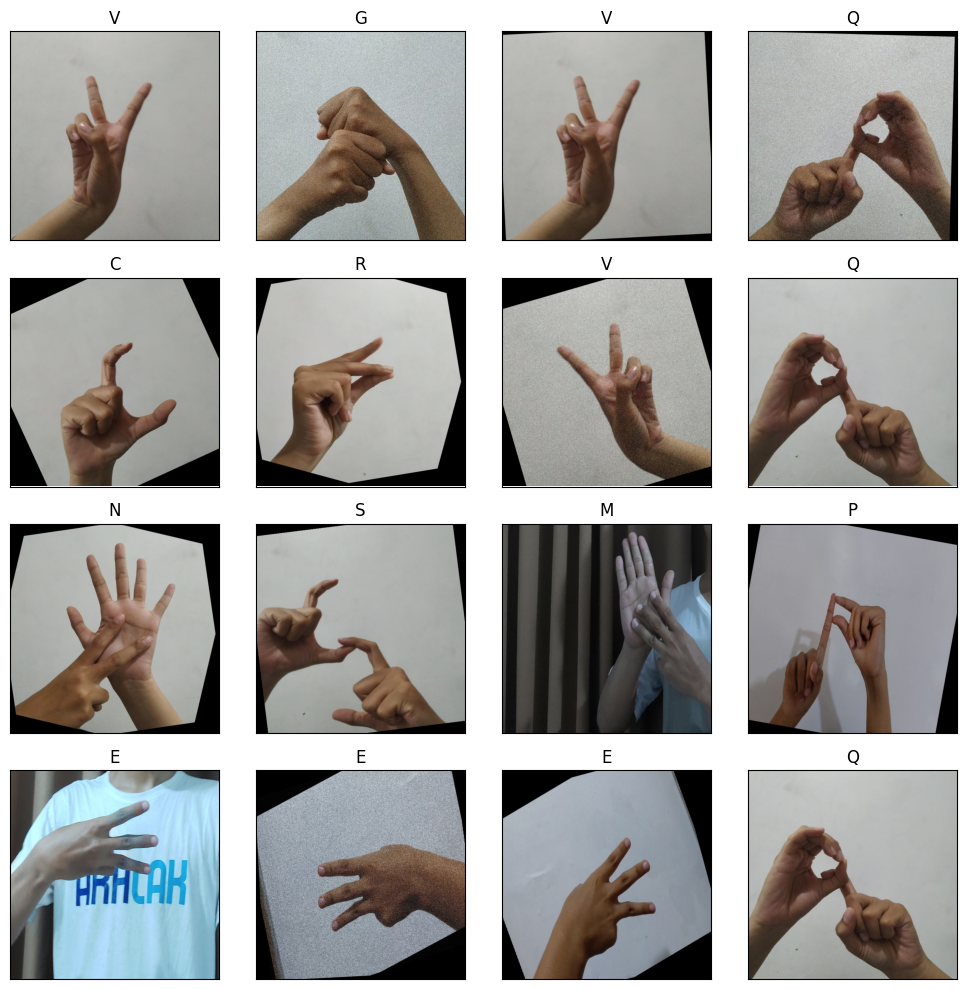

In [ ]:
# Display 16 picture of the dataset with their labels
random_index = np.random.randint(0, len(df), 16)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    image = Image.open(df.file_path[random_index[i]])
    ax.imshow(image)
    ax.set_title(df.label[random_index[i]])
plt.tight_layout()
plt.show()


# Data Preprocessing

In [ ]:
# Separate in train and test data
train_df, test_df = train_test_split(df, test_size=0.2, shuffle=True, random_state=42)

In [ ]:
train_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    validation_split=0.2
)

test_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [ ]:
# Split the data into three categories.
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='file_path',
    y_col='label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='file_path',
    y_col='label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='file_path',
    y_col='label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 7341 validated image filenames belonging to 26 classes.
Found 1835 validated image filenames belonging to 26 classes.
Found 2294 validated image filenames belonging to 26 classes.


In [ ]:
# Resize Layer
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(224,224),
  layers.experimental.preprocessing.Rescaling(1./255),
])

# Training Model



*   Batch size = 32
*   Epoch = 100
*   Input Shape  = (224, 224, 3)
*   Output layer = 1





In [ ]:
# Load the pretained model
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
# Create checkpoint callback
checkpoint_path = "model_checkpoint"
checkpoint_callback = ModelCheckpoint(checkpoint_path,
                                      save_weights_only=True,
                                      monitor="val_accuracy",
                                      save_best_only=True)

In [ ]:
# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 3 epochs
early_stopping = EarlyStopping(monitor = "val_loss", # watch the val loss metric
                               patience = 5,
                               restore_best_weights = True) # if val loss decreases for 3 epochs in a row, stop training

Optimizers = Adam

In [ ]:
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  """
  Creates a TensorBoard callback instand to store log files.

  Stores log files with the filepath:
    "dir_name/experiment_name/current_datetime/"

  Args:
    dir_name: target directory to store TensorBoard log files
    experiment_name: name of experiment directory (e.g. efficientnet_model_1)
  """
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

Functional API

In [ ]:
inputs = pretrained_model.input
x = resize_and_rescale(inputs)

x = Dense(256, activation='relu')(pretrained_model.output)
x = Dropout(0.2)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)


# Mengganti jumlah unit di layer output terakhir
outputs = Dense(26, activation='softmax')(x)  # Sesuaikan jumlah unit dengan jumlah kelas

model = Model(inputs=inputs, outputs=outputs)

# Compile model
model.compile(
    optimizer=Adam(0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Melatih model
history = model.fit(
    train_images,
    steps_per_epoch=len(train_images),
    validation_data=val_images,
    validation_steps=len(val_images),
    epochs=100,
    callbacks=[
        early_stopping,
        create_tensorboard_callback("training_logs", "bisindo"),
        checkpoint_callback,
    ]
)

Saving TensorBoard log files to: training_logs/bisindo/20240606-115038
Epoch 1/100
230/230 [==============================] - 65s 253ms/step - loss: 2.5223 - accuracy: 0.3557 - val_loss: 1.4319 - val_accuracy: 0.7482
Epoch 2/100
230/230 [==============================] - 58s 252ms/step - loss: 1.2319 - accuracy: 0.7081 - val_loss: 0.7668 - val_accuracy: 0.8098
Epoch 3/100
230/230 [==============================] - 66s 289ms/step - loss: 0.8216 - accuracy: 0.7822 - val_loss: 0.5934 - val_accuracy: 0.8452
Epoch 4/100
230/230 [==============================] - 45s 197ms/step - loss: 0.6376 - accuracy: 0.8280 - val_loss: 0.4961 - val_accuracy: 0.8665
Epoch 5/100
230/230 [==============================] - 45s 196ms/step - loss: 0.5185 - accuracy: 0.8557 - val_loss: 0.4209 - val_accuracy: 0.8926
Epoch 6/100
230/230 [==============================] - 44s 193ms/step - loss: 0.4336 - accuracy: 0.8782 - val_loss: 0.3733 - val_accuracy: 0.8992
Epoch 7/100
230/230 [==============================] 

In [ ]:
results = model.evaluate(test_images, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.09236
Test Accuracy: 96.99%


In [ ]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.

  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();


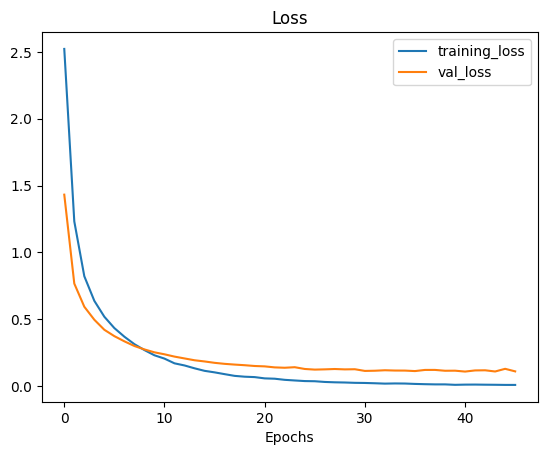

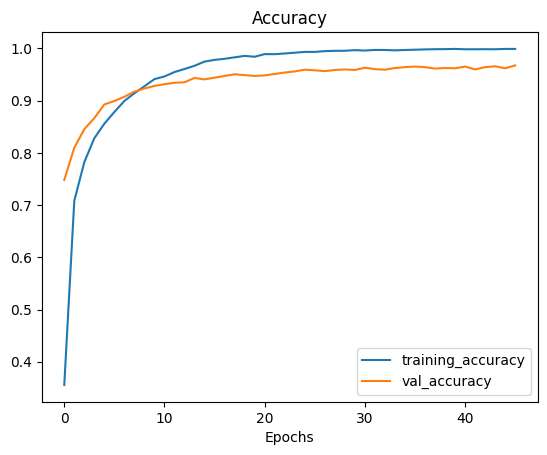

In [ ]:
plot_loss_curves(history)

# Making Prediction on Test Data

In [ ]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

# Display the result
print(f'The first 5 predictions: {pred[:5]}')

72/72 [==============================] - 12s 151ms/step
The first 5 predictions: ['M', 'W', 'Q', 'X', 'B']


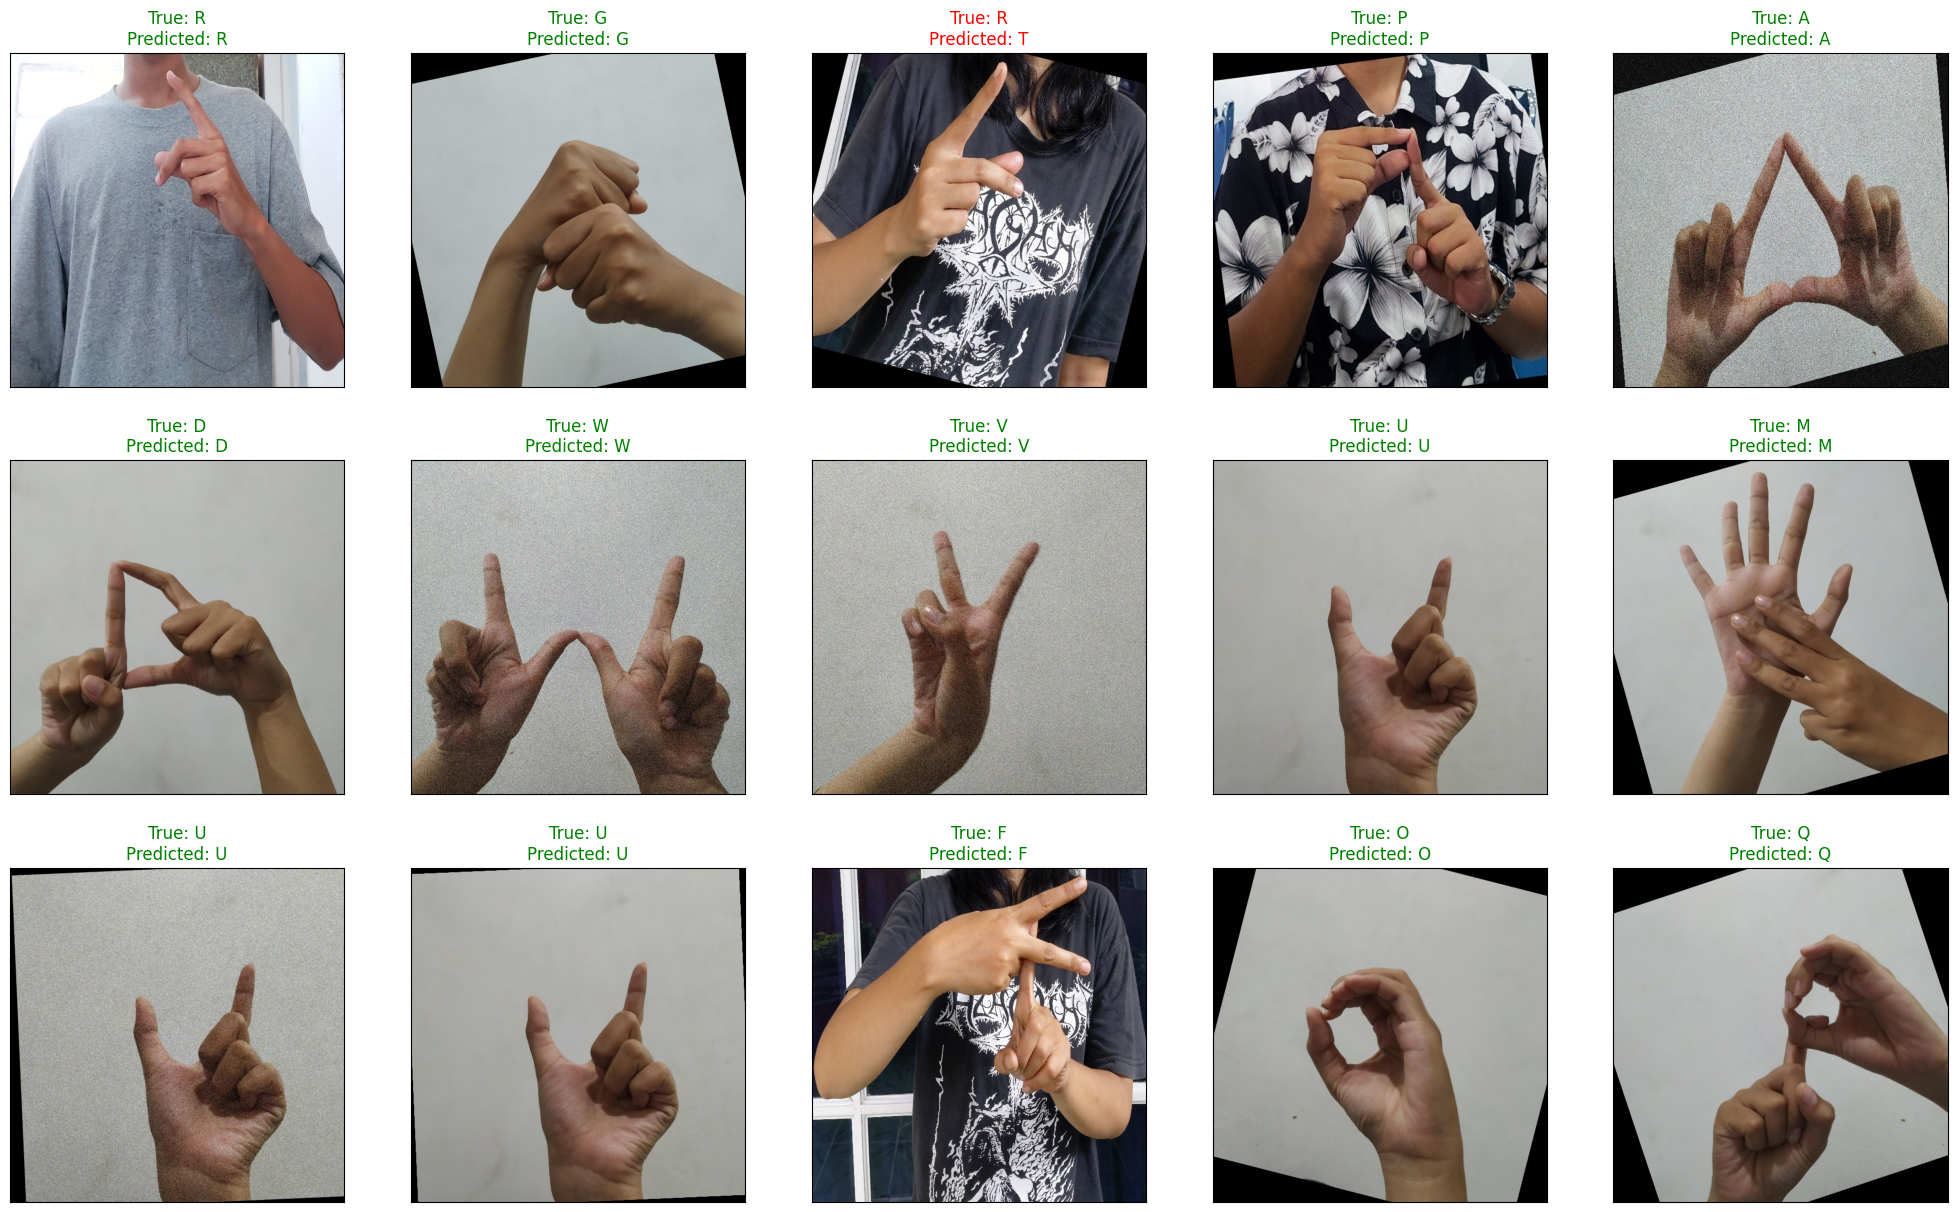

<Figure size 640x480 with 0 Axes>

In [ ]:
 # Display 25 random pictures from the dataset with their labels
random_index = np.random.randint(0, len(test_df) - 1, 15)
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    image = Image.open(test_df.file_path.iloc[random_index[i]])
    ax.imshow(image)
    if test_df.label.iloc[random_index[i]] == pred[random_index[i]]:
      color = "green"
    else:
      color = "red"
    ax.set_title(f"True: {test_df.label.iloc[random_index[i]]}\nPredicted: {pred[random_index[i]]}", color=color)
plt.show()
plt.tight_layout()

# Plotting the Classification Reports and Confusion Matrix

In [ ]:
y_test = list(test_df.label)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           A       1.00      0.97      0.98        86
           B       0.99      0.99      0.99        82
           C       0.99      0.99      0.99        80
           D       0.96      0.97      0.96        93
           E       0.95      1.00      0.97        86
           F       1.00      0.92      0.96        83
           G       0.97      0.99      0.98        97
           H       0.95      1.00      0.97        74
           I       0.96      0.94      0.95        96
           J       0.98      0.96      0.97        90
           K       0.99      0.99      0.99        87
           L       0.95      0.94      0.95        88
           M       0.89      0.95      0.92        84
           N       0.94      0.91      0.93        90
           O       1.00      1.00      1.00        89
           P       0.96      0.98      0.97        83
           Q       0.96      0.97      0.96        96
           R       0.93    

In [ ]:
report = classification_report(y_test, pred, output_dict=True)
df = pd.DataFrame(report).transpose()
df

precision    recall  f1-score      support
A              1.000000  0.965116  0.982249    86.000000
B              0.987805  0.987805  0.987805    82.000000
C              0.987500  0.987500  0.987500    80.000000
D              0.957447  0.967742  0.962567    93.000000
E              0.945055  1.000000  0.971751    86.000000
F              1.000000  0.915663  0.955975    83.000000
G              0.969697  0.989691  0.979592    97.000000
H              0.948718  1.000000  0.973684    74.000000
I              0.957447  0.937500  0.947368    96.000000
J              0.977273  0.955556  0.966292    90.000000
K              0.988506  0.988506  0.988506    87.000000
L              0.954023  0.943182  0.948571    88.000000
M              0.888889  0.952381  0.919540    84.000000
N              0.942529  0.911111  0.926554    90.000000
O              1.000000  1.000000  1.000000    89.000000
P              0.964286  0.975904  0.970060    83.000000
Q              0.958763  0.968750  0.963731    96.000000
R              0.934783  0.966292  0.950276    89.000000
S              0.952941  0.952941  0.952941    85.000000
T              0.975904  0.941860  0.958580    86.000000
U              1.000000  0.947917  0.973262    96.000000
V              0.979798  1.000000  0.989796    97.000000
W              0.989247  0.989247  0.989247    93.000000
X              0.990566  0.990566  0.990566   106.000000
Y              0.987805  1.000000  0.993865    81.000000
Z              0.987013  0.987013  0.987013    77.000000
accuracy       0.969922  0.969922  0.969922     0.969922
macro avg      0.970230  0.970086  0.969896  2294.000000
weighted avg   0.970424  0.969922  0.969918  2294.000000

In [ ]:
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(15, 7), text_size=10, norm=False, savefig=False):
    """Makes a labelled confusion matrix comparing predictions and ground truth labels.

    If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).
    Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
    """
  # Create the confustion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
    n_classes = cm.shape[0] # find the number of classes we're dealing with

    # Plot the figure and make it pretty
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
    fig.colorbar(cax)

    # Are there a list of classes?
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
    # Make x-axis labels appear on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()
    ### Added: Rotate xticks for readability & increase font size (required due to such a large confusion matrix)
    plt.xticks(rotation=90, fontsize=text_size)
    plt.yticks(fontsize=text_size)

    # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if norm:
            plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                horizontalalignment="center",
                color="white" if cm[i, j] > threshold else "black",
                size=text_size)
        else:
            plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
                     size=text_size)

  # Save the figure to the current working directory
    if savefig:
        fig.savefig("confusion_matrix.png")

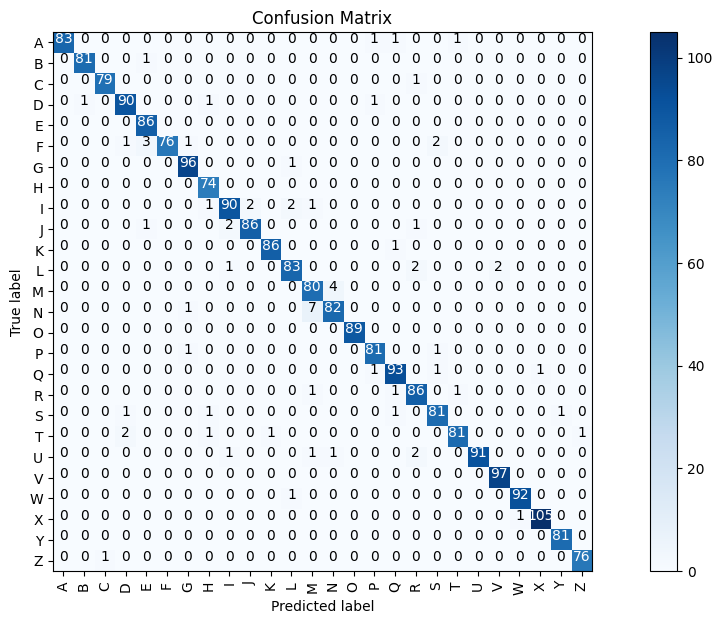

In [ ]:
make_confusion_matrix(y_test, pred, list(labels.values()))

In [ ]:
model.save('./MyDrive/ISHARA/savemodel/model.pb')
model.save('./MyDrive/ISHARA/savemodel/model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# EXERCISE: Use the tf.saved_model API to save your model in the SavedModel format.
export_dir = './MyDrive/ISHARA/savemodel'

tf.saved_model.save(model,export_dir=export_dir)

In [ ]:
model.save('./MyDrive/ISHARA/savemodel/model')

In [ ]:
my_model = tf.keras.models.load_model('./MyDrive/ISHARA/savemodel/model')

In [ ]:
# EXERCISE: Use the TFLiteConverter SavedModel API to initialize the converter
converter = tf.lite.TFLiteConverter.from_keras_model(my_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

In [ ]:
import pathlib
tflite_model_file = pathlib.Path('./MyDrive/ISHARA/savemodel/modelishara.tflite')
tflite_model_file.write_bytes(tflite_model)

2902656

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.models import load_model

# Upload files
uploaded = files.upload()

# Load your pre-trained model
model = load_model('./MyDrive/ISHARA/savemodel/model.h5')  # Make sure to update this with the actual path to your model

# Assuming train_images is a dataset object or a generator that you used during training
# You need to define or load it accordingly. This is a placeholder.
# Example:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# train_datagen = ImageDataGenerator(...)
# train_images = train_datagen.flow_from_directory('your_train_data_directory', ...)

for fn in uploaded.keys():
    # Predicting images
    path = fn
    img = load_img(path, target_size=(224, 224))

    # Convert the image to a numpy array
    img_array = img_to_array(img)

    # Expand dimensions to match the expected input shape (1, 224, 224, 3)
    img_array = np.expand_dims(img_array, axis=0)

    # Normalize the image data
    img_array = img_array / 255.0

    # Make prediction
    pred = model.predict(img_array)
    pred = np.argmax(pred, axis=1)

    # Assuming train_images.class_indices is available
    labels = (train_images.class_indices)
    labels = dict((v, k) for k, v in labels.items())
    pred = [labels[k] for k in pred]

    print(fn)
    print(pred)


Saving wall white (2).jpg to wall white (2) (3).jpg
1/1 [==============================] - 1s 887ms/step
wall white (2) (3).jpg
['A']


In [ ]:
from google.colab import drive
from google.colab import auth
from googleapiclient.discovery import build
from googleapiclient.http import MediaFileUpload

# Langkah 1: Otentikasi dengan Google Drive API
auth.authenticate_user()

# Langkah 2: Tentukan lokasi penyimpanan di Google Drive
# Ganti 'FOLDER_ID' dengan ID folder yang ingin Anda gunakan
FOLDER_ID = '/MyDrive/ISHARA/savemodel'

# Langkah 3: Simpan Model
# Ganti 'model.h5' dengan nama model Anda
model.save('model.h5')

# Langkah 4: Upload model ke Google Drive
drive_service = build('drive', 'v3')
file_metadata = {
    'name': 'model.h5',
    'parents': '/MyDrive/ISHARA/savemodel'
}
media = MediaFileUpload('model.h5', mimetype='application/octet-stream', resumable=True)
file = drive_service.files().create(body=file_metadata, media_body=media, fields='id').execute()
print('Model saved to Google Drive with ID:', file.get('id'))

Model saved to Google Drive with ID: 1FmgiT73i54q2Li5-AbnSqSq44IVj6uuO
